In [1]:
# pip install tensorflow

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import h5py
from pprint import pprint
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("AlephBtag_MC_small_v2.csv", delimiter=r'\s+')

In [4]:
df.head()

energy  cTheta     phi  prob_b  spheri  pt2rel  multip  bqvjet  ptlrel  \
0  46.8299  0.3871  0.8528  0.0327  0.2105  0.0302  0.4776  0.0314 -0.0003   
1  45.6397 -0.3943 -2.2817  0.0035  0.3457  0.0314  0.3497  0.0106 -0.0003   
2  48.8960 -0.4613 -0.6139  0.0649  0.0872  0.0254  0.1288  0.1074 -0.0003   
3  39.1577  0.4668  2.4818  0.0027  0.1570  0.0147  0.2732  0.2117  0.0240   
4  43.7354 -0.7642  1.7872  0.4320  0.4873  0.0505  0.3536  0.4578 -0.0003   

   nnbjet  isb  
0  0.1642    0  
1  0.1055    0  
2  0.1183    0  
3  0.1612    0  
4  0.9969    1

In [5]:
X_=df.drop(columns={"isb"})
y_=df["isb"]

In [6]:
# X_ = np.asarray(X_).astype(np.float32)

In [7]:
X_.shape

(33968, 10)

In [8]:
y_.shape

(33968,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2,
                                                    random_state=29)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(128,input_dim=X_.shape[1]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',#SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train on 27174 samples, validate on 6794 samples
Epoch 1/10
27174/27174 [==============================] - 1s 45us/sample - loss: 0.7300 - accuracy: 0.7025 - val_loss: 0.5084 - val_accuracy: 0.7732
Epoch 2/10
27174/27174 [==============================] - 1s 26us/sample - loss: 0.5108 - accuracy: 0.7712 - val_loss: 0.4255 - val_accuracy: 0.7926
Epoch 3/10
27174/27174 [==============================] - 1s 29us/sample - loss: 0.4045 - accuracy: 0.8305 - val_loss: 0.3195 - val_accuracy: 0.8958
Epoch 4/10
27174/27174 [==============================] - 1s 27us/sample - loss: 0.3375 - accuracy: 0.8726 - val_loss: 0.2832 - val_accuracy: 0.8965
Epoch 5/10
27174/27174 [==============================] - 1s 28us/sample - loss: 0.3084 - accuracy: 0.8861 - val_loss: 0.2753 - val_accuracy: 0.8986
Epoch 6/10
27174/27174 [==============================] - 1s 26us/sample - loss: 0.2993 - accuracy: 0.8927 - val_loss: 0.2724 - val_accuracy: 0.8970
Epoch 7/10
27174/27174 [==============================] -

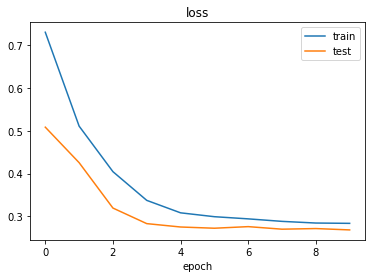

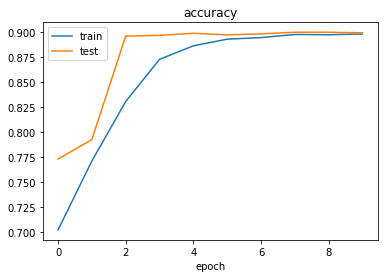

In [12]:
# model.fit(df_train, df_train_labels, epochs=10)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=64,
                    epochs=10)

print(history.history)

#
model.save("modelNN-2020.h5")
plt.figure()

print(history.history.keys())
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('loss')
plt.legend()
# plt.ylabel('log_loss')
plt.xlabel('epoch')
plt.savefig("NN-2020-loss.png")

plt.figure()
print(history.history.keys())
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('accuracy')
plt.legend()
# plt.ylabel('log_loss')
plt.xlabel('epoch')

plt.savefig("NN-2020-accuracy.png")

In [13]:
y_pred= model.predict(X_test)

In [14]:
predict_df=pd.DataFrame(y_pred)
predict_df =predict_df.rename(columns={ 0 : "isb_predict"})
predict_df["isb"]=y_

In [15]:
predict_df.head()

isb_predict  isb
0     0.045340    0
1     0.016235    0
2     0.918410    0
3     0.013134    0
4     0.010896    1